In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
#data=pd.read_excel("C:/Users/Pradeep/Desktop/customer_churn_large_dataset.xlsx")

In [3]:
df=pd.read_excel("customer_churn_large_dataset.xlsx")#reading the data

In [4]:
df.head()#top 5 rows

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.isnull().sum()#finding null values

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
df.info()#information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.describe()#describe

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
df=df.drop_duplicates()#droping duplicates

In [9]:
dataframe_1 = df[df['Churn']==1]#calculating no_churn values
no_churn = len(dataframe_1)

In [10]:
no_churn

49779

In [11]:
dataframe_1 = df[df['Churn']==0]#calculating churn values
churn = len(dataframe_1)
churn

50221

0    50221
1    49779
Name: Churn, dtype: int64


Text(0, 0.5, 'Number of transactions')

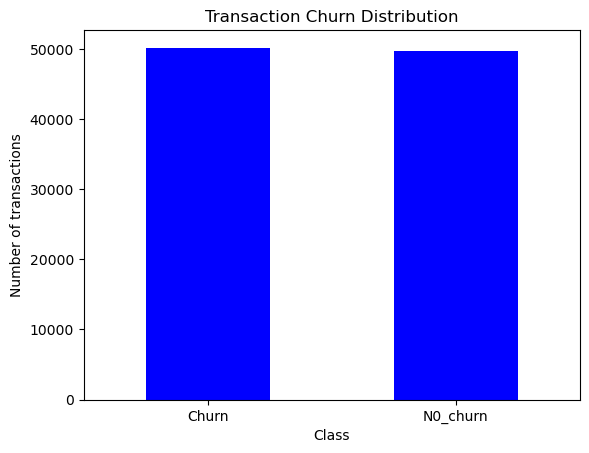

In [12]:
#graph of Churn
LABELS = ["Churn", "N0_churn"]
count_classes = pd.value_counts(df["Churn"], sort = True)
count_classes.plot(kind = 'bar', rot=0,color='blue')
print(count_classes)
plt.title("Transaction Churn Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of transactions")

In [13]:
corr_matrix=df.corr()#correlation matrix
corr_matrix

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_32496\930350668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()#correlation matrix


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

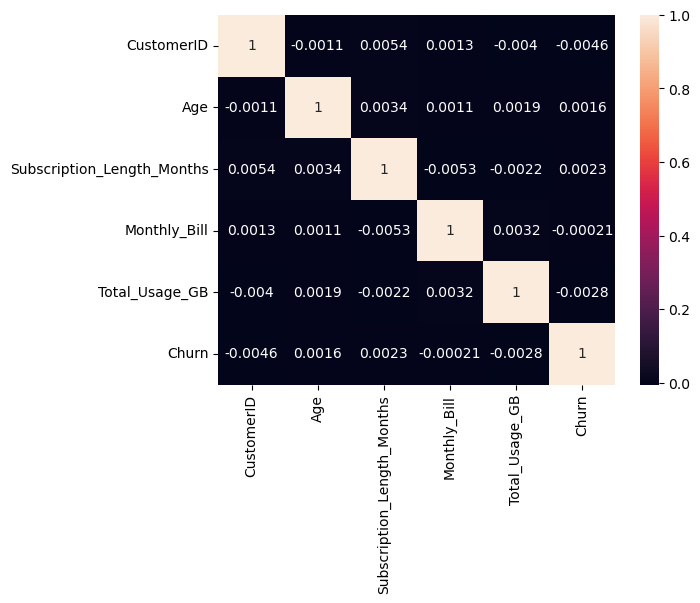

In [14]:
sns.heatmap(corr_matrix,annot=True)#heatmap

In [15]:
#label encoding 
to_encode=['Name','Gender','Location']
coder=LabelEncoder()
for i in to_encode:
    df[i]=coder.fit_transform(df[i])

In [16]:
df.info()#info after encoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  int32  
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  int32  
 4   Location                    100000 non-null  int32  
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 6.5 MB


In [17]:
#logistic

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
#feature selection
x=df[["Age","Subscription_Length_Months","Total_Usage_GB" ,"Monthly_Bill",'Gender','Location']]

In [20]:
y=df["Churn"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)#diving testing and training data


In [22]:
model=LogisticRegression()#trainig the data using logistic regression
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
prd=model.predict(x_test)#predticting the data

In [24]:
#output 
comp=x_test.copy()
comp=pd.DataFrame({'actual':y_test,'prediction':prd})
comp

,actual,prediction
3582,0,0
60498,1,1
53227,0,1
21333,0,0
3885,0,0
...,...,...
86308,0,0
48870,1,1
34940,1,0
21964,0,1


In [25]:
#classification

In [26]:
clf = LogisticRegression(max_iter=10000)#trainig the data using logistic regression with max iteration of 1000
clf.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [27]:
 y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56     15081
           1       0.50      0.37      0.42     14919

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [28]:
#displaying the output
result_df = pd.DataFrame({'Row': range(1, len(y_test) + 1), 'Actual': y_test, 'Predicted': y_pred})
result_df

,Row,Actual,Predicted
3582,1,0,0
60498,2,1,1
53227,3,0,1
21333,4,0,0
3885,5,0,0
...,...,...,...
86308,29996,0,0
48870,29997,1,1
34940,29998,1,0
21964,29999,0,1


In [29]:
#displaying confusion matrix
cnm_clf=confusion_matrix(y_test,y_pred)
cnm_clf

array([[9490, 5591],
       [9398, 5521]], dtype=int64)